In [184]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot

# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [185]:
train = pd.read_excel('credit-data-training.xlsx')
test = pd.read_excel('customers-to-score.xlsx')

In [186]:
train.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,None,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1


In [187]:
# test.head()

In [188]:
print (test.shape)
print (train.shape)

(500, 19)
(500, 20)


In [189]:
train['Age-years']=train['Age-years'].fillna(33)

In [190]:
train['Guarantors'].value_counts()

None    457
Yes      43
Name: Guarantors, dtype: int64

In [191]:
del test['Concurrent-Credits']
del train['Concurrent-Credits']

del test['Occupation']
del train['Occupation']

del test['Guarantors']
del train['Guarantors']

del test['No-of-dependents']
del train['No-of-dependents']

del test['Foreign-Worker']
del train['Foreign-Worker']

del test['Duration-in-Current-address']
del train['Duration-in-Current-address']

del test['Telephone']
del train['Telephone']

In [192]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
Credit-Application-Result            500 non-null object
Account-Balance                      500 non-null object
Duration-of-Credit-Month             500 non-null int64
Payment-Status-of-Previous-Credit    500 non-null object
Purpose                              500 non-null object
Credit-Amount                        500 non-null int64
Value-Savings-Stocks                 500 non-null object
Length-of-current-employment         500 non-null object
Instalment-per-cent                  500 non-null int64
Most-valuable-available-asset        500 non-null int64
Age-years                            500 non-null float64
Type-of-apartment                    500 non-null int64
No-of-Credits-at-this-Bank           500 non-null object
dtypes: float64(1), int64(5), object(7)
memory usage: 50.9+ KB


In [193]:
# train['Credit-Application-Result'].value_counts()
# train['Account-Balance'].value_counts()
# train['Purpose'].value_counts() # 4 catogries 
# train['Payment-Status-of-Previous-Credit'].value_counts()# 3 catogries
# train['Value-Savings-Stocks'].value_counts()# 3 catogries
# train['Length-of-current-employment'].value_counts() # 3 catogries
# train['No-of-Credits-at-this-Bank'].value_counts()
# train['Credit-Amount'].value_counts()
# train['Duration-of-Credit-Month'].value_counts()
# train['Most-valuable-available-asset'].value_counts()
train['Type-of-apartment'].value_counts()



2    352
1     92
3     56
Name: Type-of-apartment, dtype: int64

In [194]:
train['Payment-Status-of-Previous-Credit'] = train['Payment-Status-of-Previous-Credit'].apply(lambda x: 1 if x=='Paid Up' else 2 if x=='Some Problems' else 3)
train['Value-Savings-Stocks'] = train['Value-Savings-Stocks'].apply(lambda x: 1 if x=='None' else 2 if x=='£100-£1000' else 3) 
train['Length-of-current-employment'] = train['Length-of-current-employment'].apply(lambda x: 1 if x=='< 1yr' else 2 if x=='4-7 yrs' else 3) 
train['Purpose'] = train['Purpose'].apply(lambda x: 1 if x=='Home Related' else 2 if x=='Used car' else 3 if x== 'New car' else 4) 

train['Credit-Application-Result']=train['Credit-Application-Result'].apply(lambda x: 1 if x=='Creditworthy' else 0 )
train['Account-Balance']=train['Account-Balance'].apply(lambda x: 1 if x=='Some Balance' else 0 )
train['No-of-Credits-at-this-Bank']=train['No-of-Credits-at-this-Bank'].apply(lambda x: 1 if x=='1' else 0 )

In [195]:
test['Account-Balance']=test['Account-Balance'].apply(lambda x: 1 if x=='Some Balance' else 0 )
test['Purpose'] = test['Purpose'].apply(lambda x: 1 if x=='Home Related' else 2 if x=='Used car' else 3 if x== 'New car' else 4)
test['Payment-Status-of-Previous-Credit'] = test['Payment-Status-of-Previous-Credit'].apply(lambda x: 1 if x=='Paid Up' else 2 if x=='Some Problems' else 3)
test['Value-Savings-Stocks'] = test['Value-Savings-Stocks'].apply(lambda x: 1 if x=='None' else 2 if x=='£100-£1000' else 3) 
test['Length-of-current-employment'] = test['Length-of-current-employment'].apply(lambda x: 1 if x=='< 1yr' else 2 if x=='4-7 yrs' else 3) 
test['No-of-Credits-at-this-Bank']=test['No-of-Credits-at-this-Bank'].apply(lambda x: 1 if x=='1' else 0 )

In [196]:
y = train['Credit-Application-Result']
X = train[['Account-Balance',
       'Duration-of-Credit-Month', 'Payment-Status-of-Previous-Credit',
       'Purpose', 'Credit-Amount', 'Value-Savings-Stocks',
       'Length-of-current-employment', 'Instalment-per-cent',
       'Most-valuable-available-asset', 'Age-years', 'Type-of-apartment',
       'No-of-Credits-at-this-Bank']]
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, test_size=0.3,random_state =1)

In [13]:
X_train = train[test.keys()]
y_train = train['Credit-Application-Result']
X_test= test
from sklearn.model_selection import train_test_split

In [197]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV



scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(x_test_scaled)

In [130]:
from sklearn.ensemble import AdaBoostClassifier
# bm = AdaBoostClassifier()
# bm.fit(X_train, y_train)
# print(bm.score(X_train,y_train))
# print(bm.score(X_test,y_test))
gs_b = GridSearchCV(AdaBoostClassifier(), n_jobs=-1,param_grid={}, cv=5)
gs_b.fit(X_train, y_train)
gs_b.best_score_


0.432

In [121]:
dtc_params = {
    'max_depth': range(1,2),
    #'max_features': [None, 'log2', 'sqrt'],
    'min_samples_split': range(20,30),
    'max_leaf_nodes': [None],
    'min_samples_leaf': range(1,10)
}

from sklearn.model_selection import GridSearchCV
# set the gridsearch
dtc_gs = GridSearchCV(DecisionTreeClassifier(), dtc_params,  n_jobs=-1, cv=5)

In [122]:
dtc_gs.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(1, 2), 'max_leaf_nodes': [None],
                         'min_samples_leaf': range(1, 10),
  

In [123]:
predictions = dtc_gs.best_estimator_.predict(X_test)


In [124]:
np.sum((predictions == 1))
dtc_gs.best_score_
# dtc_gs.score(X_test,y_test)

0.636

In [1104]:

# from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# rf_params = {
#       'n_estimators': range(1,50),
# #     'max_features':[2, 3, 5, 7, 8],
#       'max_depth': range(1,20),
#      'criterion':['gini', 'entropy'],
# }
# rf_g = RandomForestClassifier()
# gs_rf2 = GridSearchCV(rf_g, param_grid=rf_params, cv=5, verbose = 1)#, refit=False)
# gs_rf2=gs.fit(X_train, y_train)

# predictions_rf2 = gs_rf.best_estimator_.predict(X_test)
# np.sum((predictions_rf == 1))
# gs_rf.best_score_
# gs_rf.score(X_test,y_test)


In [107]:

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

rf_params = {
      'n_estimators': range(1,5),
     'max_features':[2,3,4],
      'max_depth': range(1,10),
     #'criterion':['gini', 'entropy'],
}
rf_g = RandomForestClassifier()
gs_rf = GridSearchCV(rf_g, param_grid=rf_params, cv=2, verbose = 1)#, refit=False)
gs_rf=gs_rf.fit(X_train, y_train)


Fitting 2 folds for each of 108 candidates, totalling 216 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:    1.6s finished


In [108]:
predictions_rf = gs_rf.best_estimator_.predict(X_test)


In [139]:
np.sum((predictions_rf == 1))
# gs_rf.best_score_
# gs_rf.score(X_test,y_test)

409

In [116]:

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
model = LogisticRegression()
params = {#'C':np.logspace(-5,5,5),
          #'penalty':['l1'],
          'fit_intercept':[True]}
gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=2,
                  scoring='accuracy',
                  return_train_score=True)
gs.fit(X_train,y_train)
print(gs.best_score_)
# gs.score(X_test,y_test)

0.724


In [234]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lg = LogisticRegression()
lg.fit(X_train,y_train)
predictions_lg =lg.predict(X_test)
print(lg.score(X_train,y_train))
print(lg.score(X_test,y_test))

0.7542857142857143
0.7933333333333333


In [235]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

1.0
0.68


In [271]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))


0.9971428571428571
0.8


False

In [245]:
from sklearn.ensemble import AdaBoostClassifier
bm = AdaBoostClassifier()
bm.fit(X_train, y_train)
print(bm.score(X_train,y_train))
print(bm.score(X_test,y_test))

0.8342857142857143
0.7666666666666667


In [222]:
y = train['Credit-Application-Result']
X = train[['Account-Balance',
       'Duration-of-Credit-Month', 'Payment-Status-of-Previous-Credit',
       'Purpose', 'Credit-Amount', 'Value-Savings-Stocks',
       'Length-of-current-employment', 'Instalment-per-cent',
       'Most-valuable-available-asset', 'Age-years', 'Type-of-apartment',
       'No-of-Credits-at-this-Bank']]
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, test_size=0.3,random_state =1)

scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(x_test_scaled)

Feature: 0, Score: 1.24526
Feature: 1, Score: -0.82183
Feature: 2, Score: 0.60614
Feature: 3, Score: 0.92642
Feature: 4, Score: -1.17395
Feature: 5, Score: 0.90943
Feature: 6, Score: 0.74083
Feature: 7, Score: -0.75519
Feature: 8, Score: -0.60509
Feature: 9, Score: 0.26632
Feature: 10, Score: 0.07968
Feature: 11, Score: 0.38144


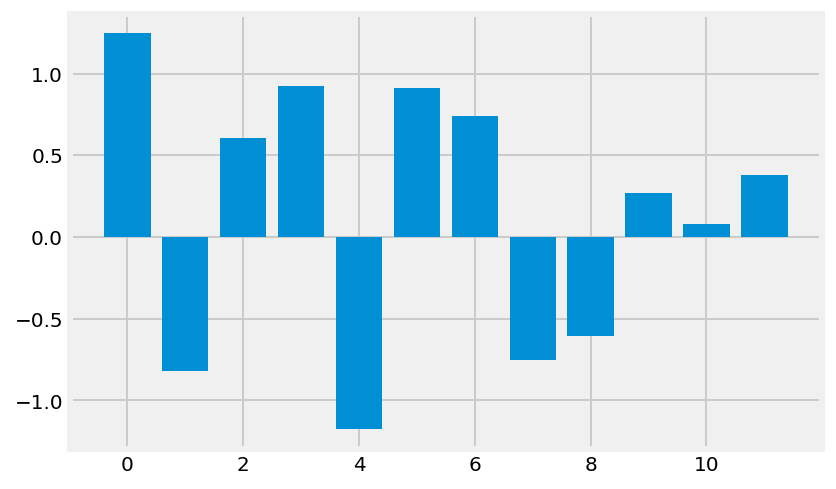

In [244]:
from matplotlib import pyplot
importance = lg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.08511
Feature: 1, Score: 0.17486
Feature: 2, Score: 0.01878
Feature: 3, Score: 0.03364
Feature: 4, Score: 0.29202
Feature: 5, Score: 0.03555
Feature: 6, Score: 0.03707
Feature: 7, Score: 0.05194
Feature: 8, Score: 0.03916
Feature: 9, Score: 0.19514
Feature: 10, Score: 0.01427
Feature: 11, Score: 0.02247


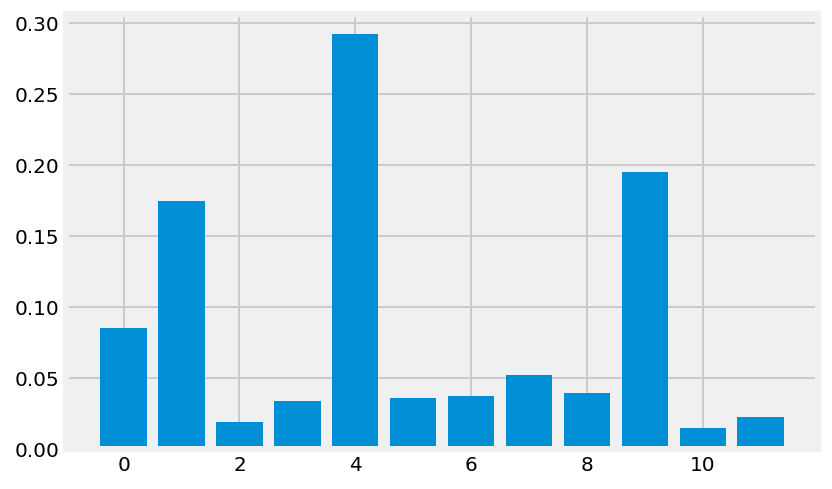

In [241]:
importance = dt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.06871
Feature: 1, Score: 0.13186
Feature: 2, Score: 0.04110
Feature: 3, Score: 0.06171
Feature: 4, Score: 0.23648
Feature: 5, Score: 0.04597
Feature: 6, Score: 0.04935
Feature: 7, Score: 0.07319
Feature: 8, Score: 0.06907
Feature: 9, Score: 0.15954
Feature: 10, Score: 0.03951
Feature: 11, Score: 0.02352


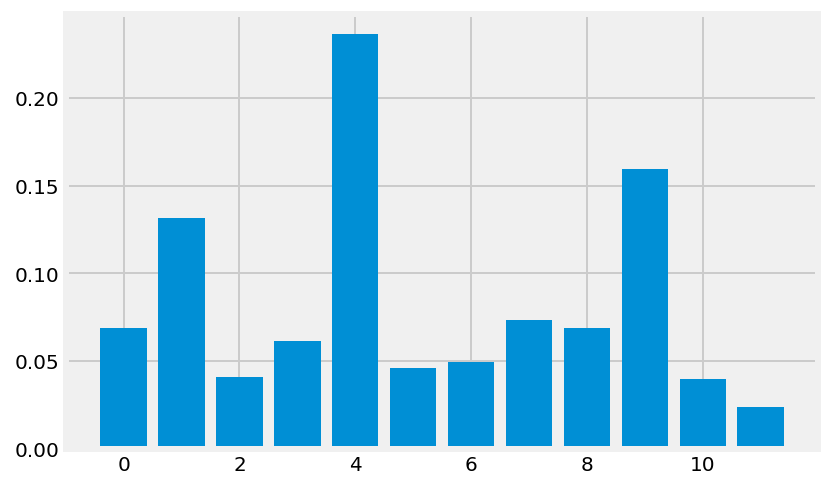

In [242]:
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.02000
Feature: 1, Score: 0.18000
Feature: 2, Score: 0.04000
Feature: 3, Score: 0.04000
Feature: 4, Score: 0.60000
Feature: 5, Score: 0.02000
Feature: 6, Score: 0.02000
Feature: 7, Score: 0.02000
Feature: 8, Score: 0.02000
Feature: 9, Score: 0.04000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000


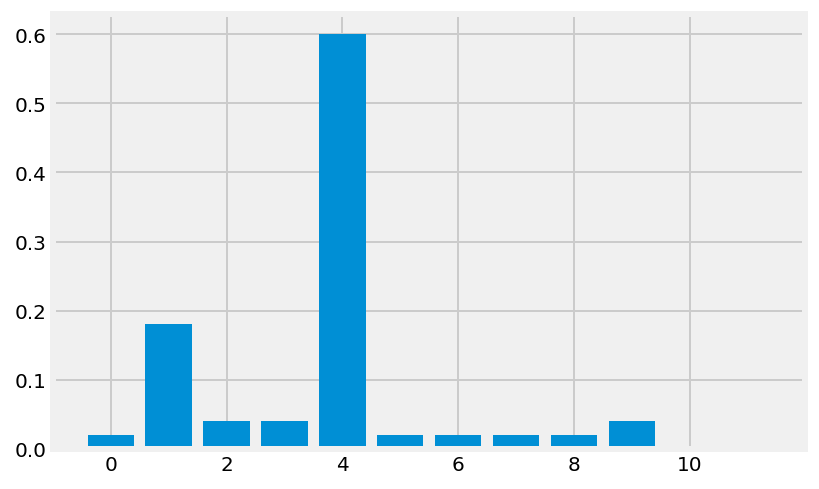

In [246]:
importance = bm.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [247]:
predictions_lg =lg.predict(X_test)

tp = np.sum((y_test == 1) & (predictions_lg  == 1)) # 1 are predicted 1
fp = np.sum((y_test == 0) & (predictions_lg  == 1)) # 0 are predicted 1
tn = np.sum((y_test == 0) & (predictions_lg  == 0)) # 0 are predicted 0
fn = np.sum((y_test == 1) & (predictions_lg  == 0)) # 1 are predicted 0
print("tp:", tp)
print("fp:", fp)
print("tn:", tn) 
print("fn:", fn)
print("Number of classification errors:", fp + fn)
print(confusion_matrix(y_test, predictions_lg , labels=[1,0]))

tp: 103
fp: 27
tn: 16
fn: 4
Number of classification errors: 31
[[103   4]
 [ 27  16]]


In [249]:
predictions_dt =dt.predict(X_test)

tp = np.sum((y_test == 1) & (predictions_dt  == 1)) # 1 are predicted 1
fp = np.sum((y_test == 0) & (predictions_dt  == 1)) # 0 are predicted 1
tn = np.sum((y_test == 0) & (predictions_dt  == 0)) # 0 are predicted 0
fn = np.sum((y_test == 1) & (predictions_dt  == 0)) # 1 are predicted 0
print("tp:", tp)
print("fp:", fp)
print("tn:", tn) 
print("fn:", fn)
print("Number of classification errors:", fp + fn)
print(confusion_matrix(y_test, predictions_dt , labels=[1,0]))



tp: 86
fp: 27
tn: 16
fn: 21
Number of classification errors: 48
[[86 21]
 [27 16]]


In [248]:
predictions_rf =rf.predict(X_test)

tp = np.sum((y_test == 1) & (predictions_rf  == 1)) # 1 are predicted 1
fp = np.sum((y_test == 0) & (predictions_rf  == 1)) # 0 are predicted 1
tn = np.sum((y_test == 0) & (predictions_rf  == 0)) # 0 are predicted 0
fn = np.sum((y_test == 1) & (predictions_rf  == 0)) # 1 are predicted 0
print("tp:", tp)
print("fp:", fp)
print("tn:", tn) 
print("fn:", fn)
print("Number of classification errors:", fp + fn)
print(confusion_matrix(y_test, predictions_rf , labels=[1,0]))



tp: 101
fp: 22
tn: 21
fn: 6
Number of classification errors: 28
[[101   6]
 [ 22  21]]


In [250]:
predictions_bm =bm.predict(X_test)

tp = np.sum((y_test == 1) & (predictions_bm  == 1)) # 1 are predicted 1
fp = np.sum((y_test == 0) & (predictions_bm  == 1)) # 0 are predicted 1
tn = np.sum((y_test == 0) & (predictions_bm  == 0)) # 0 are predicted 0
fn = np.sum((y_test == 1) & (predictions_bm  == 0)) # 1 are predicted 0
print("tp:", tp)
print("fp:", fp)
print("tn:", tn) 
print("fn:", fn)
print("Number of classification errors:", fp + fn)
print(confusion_matrix(y_test, predictions_bm , labels=[1,0]))



tp: 100
fp: 28
tn: 15
fn: 7
Number of classification errors: 35
[[100   7]
 [ 28  15]]


In [272]:
from sklearn.metrics import roc_curve, auc



In [273]:
rf_ppr= rf.predict_proba(X_test)
#Code here please
df = pd.DataFrame()
l1= list(map (lambda x : float(x) ,rf_ppr[0:, :1]))
l2 =list(map (lambda x : float(x) ,rf_ppr[0:, 1:2]))
df['class_0_pp'] =  l1
df['class_1_pp'] =  l2
df['pred_class_thresh10'] = 0
# df.class_1_pp.values
# df.head()
for c in range(len(df['class_0_pp'])):
    if df['class_1_pp'][c] > df['class_0_pp'][c]:
        df['pred_class_thresh10'][c]=1
        
df.head(9)

,class_0_pp,class_1_pp,pred_class_thresh10
0,0.2,0.8,1
1,0.7,0.3,0
2,0.5,0.5,0
3,0.2,0.8,1
4,0.6,0.4,0
5,0.1,0.9,1
6,0.4,0.6,1
7,0.0,1.0,1
8,0.3,0.7,1


No handles with labels found to put in legend.


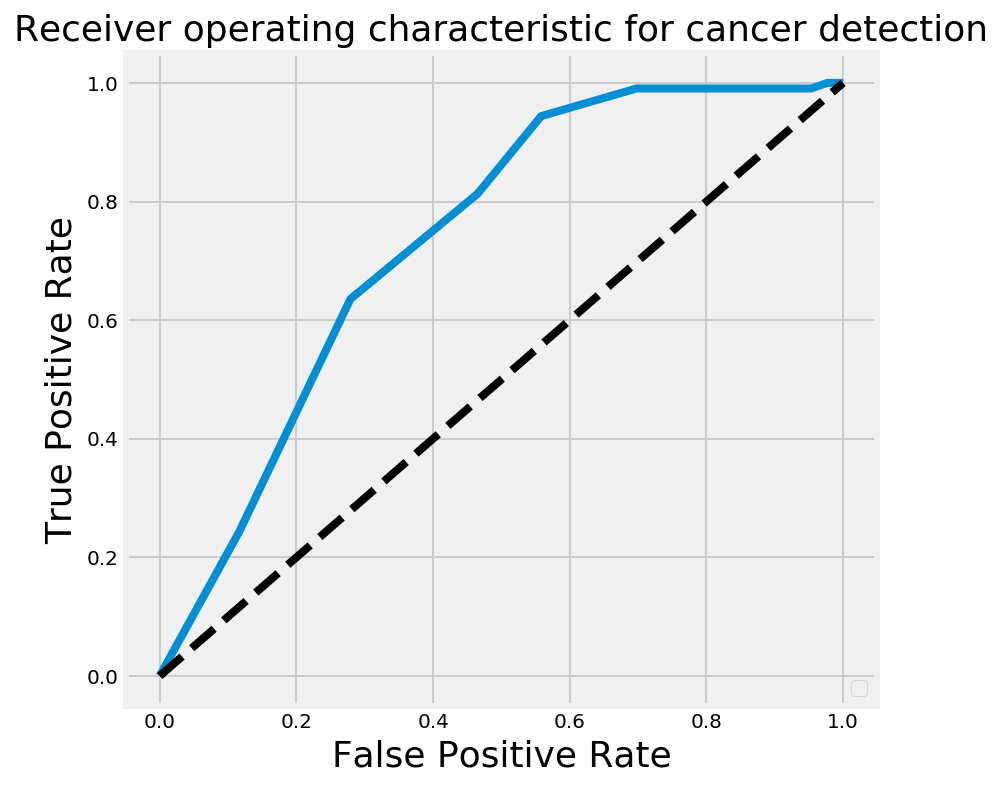

In [276]:
fpr, tpr, threshold = roc_curve(y_test, df.class_1_pp)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[6,6])
plt.plot(fpr, tpr,roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
# plt.xlim([-0.05, 1.0])
# plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()